In [44]:
import warnings
warnings.filterwarnings('ignore')


In [1]:
import pandas as pd
data = pd.read_csv('C:/Users/asus/Downloads/diabetes_dirty.csv')
data.head()


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,NaN,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1.0,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1.0,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1.0,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1.0,0,1,3,NaN,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


In [2]:

print("Shape:", data.shape)
data.info()
data.describe()
print("\nMissing Values per Column:\n", data.isnull().sum())
print("\nDuplicate Rows:", data.duplicated().sum())


Shape: (1935, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1935 non-null   int64  
 1   Age                            1935 non-null   int64  
 2   Gender                         1753 non-null   object 
 3   Ethnicity                      1935 non-null   int64  
 4   SocioeconomicStatus            1935 non-null   int64  
 5   EducationLevel                 1935 non-null   int64  
 6   BMI                            1745 non-null   float64
 7   Smoking                        1935 non-null   int64  
 8   AlcoholConsumption             1935 non-null   float64
 9   PhysicalActivity               1935 non-null   float64
 10  DietQuality                    1935 non-null   float64
 11  SleepQuality                   1935 non-null   float64
 12  FamilyHistoryDiabetes         

In [5]:
# List of numeric columns to fix missing values
num_cols = ['BMI', 'HbA1c', 'FastingBloodSugar']

# Fill missing numeric values with median
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

# Fill missing categorical value (Gender) with mode
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

# Verify missing values again
print("\nMissing Values After Filling:\n", data.isnull().sum())



Missing Values After Filling:
 PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryDiabetes            0
GestationalDiabetes              0
PolycysticOvarySyndrome          0
PreviousPreDiabetes              0
Hypertension                     0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
CholesterolTotal                 0
CholesterolLDL                   0
CholesterolHDL                   0
CholesterolTriglycerides         0
AntihypertensiveMedicat

In [6]:
# Count duplicate rows
print("Duplicate Rows Before Removal:", data.duplicated().sum())

# Remove duplicate rows
data = data.drop_duplicates()

# Confirm removal
print("Duplicate Rows After Removal:", data.duplicated().sum())
print("New Dataset Shape:", data.shape)


Duplicate Rows Before Removal: 47
Duplicate Rows After Removal: 0
New Dataset Shape: (1888, 46)


In [7]:
# Convert all gender values to uppercase and strip spaces
data['Gender'] = data['Gender'].astype(str).str.strip().str.upper()

# Replace inconsistent values
data['Gender'] = data['Gender'].replace({
    'MALE': 'M',
    'FEMALE': 'F',
    'F': 'F',
    'M': 'M'
})

# Check cleaned unique values
print("Unique Gender Values:", data['Gender'].unique())


Unique Gender Values: ['0.0' '1.0' 'M' 'F']


In [8]:
# Strip extra spaces and symbols, then fix typos
data['DoctorInCharge'] = data['DoctorInCharge'].astype(str).str.strip()

data['DoctorInCharge'] = data['DoctorInCharge'].replace({
    'Confidentail': 'Confidential',
    'Confdential': 'Confidential',
    'Confidential#': 'Confidential',
    'Confidentail ': 'Confidential',
    'Confidential ': 'Confidential'
})

# Verify unique doctor names
print("Unique Doctor Names:", data['DoctorInCharge'].unique())


Unique Doctor Names: ['Confidential']


In [9]:
# Strip spaces from Diagnosis column
data['Diagnosis'] = data['Diagnosis'].astype(str).str.strip()

# Verify fix
print("Unique Diagnoses (first 10):", data['Diagnosis'].unique()[:10])


Unique Diagnoses (first 10): ['1' '0']


In [10]:
# Check extreme values for Age and BMI
print("Age range:", data['Age'].min(), "to", data['Age'].max())
print("BMI range:", data['BMI'].min(), "to", data['BMI'].max())

# Quick statistical overview
data[['Age', 'BMI']].describe()


Age range: 0 to 200
BMI range: 0.0 to 150.0


,Age,BMI
count,1888.00000,1888.000000
mean,55.56197,27.903477
std,22.30654,9.229340
min,0.00000,0.000000
25%,38.00000,22.046571
50%,55.50000,27.602215
75%,73.00000,33.127890
max,200.00000,150.000000


In [13]:
# Fix unrealistic Age values
data.loc[(data['Age'] < 1) | (data['Age'] > 120), 'Age'] = data['Age'].median()

# Fix unrealistic BMI values
data.loc[(data['BMI'] < 10) | (data['BMI'] > 60), 'BMI'] = data['BMI'].median()


In [14]:
print("Updated Age range:", data['Age'].min(), "to", data['Age'].max())
print("Updated BMI range:", data['BMI'].min(), "to", data['BMI'].max())


Updated Age range: 20.0 to 90.0
Updated BMI range: 15.025898465763731 to 39.99881065727365


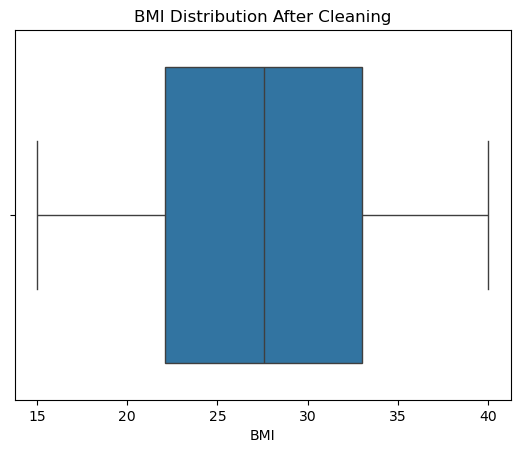

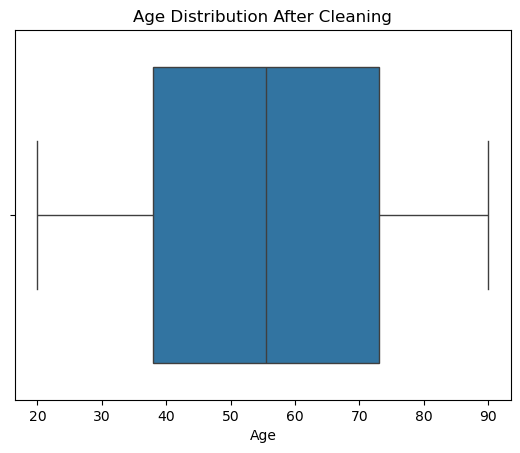

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before fixing (you can run this before cleaning step to compare)
sns.boxplot(x=data['BMI'])
plt.title("BMI Distribution After Cleaning")
plt.show()

sns.boxplot(x=data['Age'])
plt.title("Age Distribution After Cleaning")
plt.show()


In [16]:
# Basic info
print("Shape of dataset:", data.shape)
print("\nColumn types:\n", data.dtypes)

# Quick summary of numeric data
data.describe()


Shape of dataset: (1888, 46)

Column types:
 PatientID                          int64
Age                              float64
Gender                            object
Ethnicity                          int64
SocioeconomicStatus                int64
EducationLevel                     int64
BMI                              float64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryDiabetes              int64
GestationalDiabetes                int64
PolycysticOvarySyndrome            int64
PreviousPreDiabetes                int64
Hypertension                       int64
SystolicBP                         int64
DiastolicBP                        int64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float64
CholesterolT

,PatientID,Age,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,BlurredVision,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,...,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,6937.918432,55.061441,0.753708,0.992585,1.699682,27.625946,0.281780,10.099405,5.205190,4.886681,...,0.094809,0.102225,0.111229,48.471741,0.052436,0.102754,0.200212,1.994826,4.954026,5.007418
std,542.896481,20.451688,1.047488,0.765546,0.885232,6.807638,0.449986,5.907408,2.858104,2.866215,...,0.293029,0.303024,0.314499,28.726758,0.222965,0.303718,0.400265,1.122270,2.914041,2.921235
min,6000.000000,20.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,0.000885,...,0.000000,0.000000,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362
25%,6466.750000,38.000000,0.000000,0.000000,1.000000,22.087668,0.000000,4.840583,2.751027,2.455582,...,0.000000,0.000000,0.000000,23.987306,0.000000,0.000000,0.000000,1.054943,2.407939,2.396400
50%,6937.500000,55.500000,0.000000,1.000000,2.000000,27.602215,0.000000,10.174341,5.258446,4.887114,...,0.000000,0.000000,0.000000,47.335132,0.000000,0.000000,0.000000,1.986079,4.840421,5.021500
75%,7407.250000,73.000000,1.000000,2.000000,2.000000,32.994598,1.000000,15.284477,7.680110,7.339113,...,0.000000,0.000000,0.000000,72.766601,0.000000,0.000000,0.000000,2.944389,7.511719,7.586426
max,7878.000000,90.000000,3.000000,2.000000,3.000000,39.998811,1.000000,19.996231,9.993893,9.998677,...,1.000000,1.000000,1.000000,99.788530,1.000000,1.000000,1.000000,3.999715,9.997165,9.993029


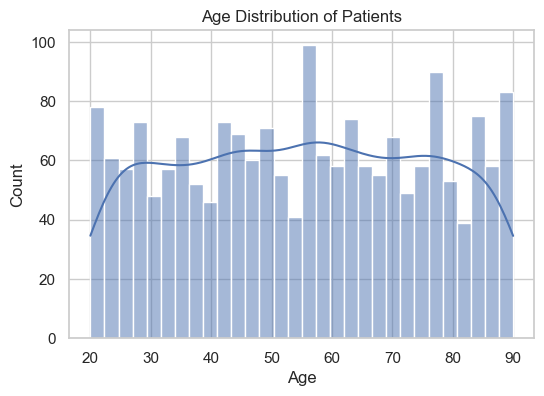

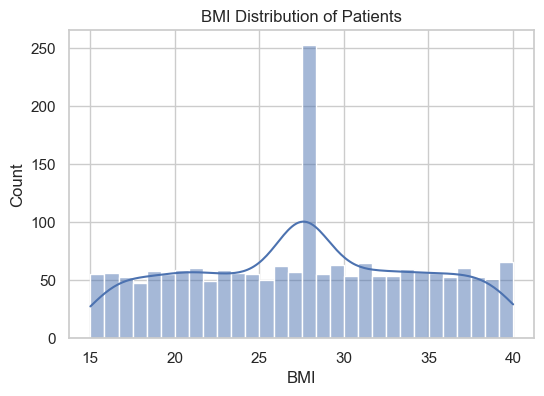

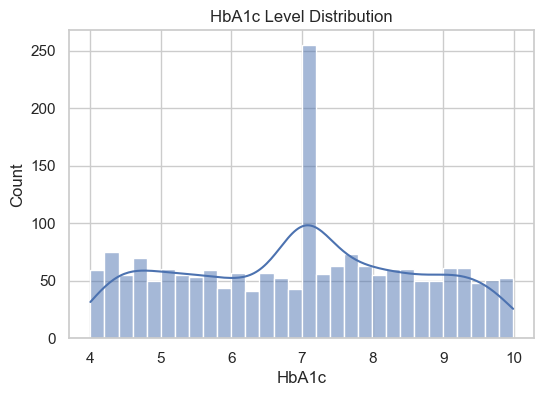

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set default style
sns.set(style="whitegrid")

# Histogram for Age
plt.figure(figsize=(6,4))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.show()

# Histogram for BMI
plt.figure(figsize=(6,4))
sns.histplot(data['BMI'], bins=30, kde=True)
plt.title("BMI Distribution of Patients")
plt.show()

# Histogram for HbA1c
plt.figure(figsize=(6,4))
sns.histplot(data['HbA1c'], bins=30, kde=True)
plt.title("HbA1c Level Distribution")
plt.show()


In [21]:
# Check which columns contain the word "Confidential"
for col in data.columns:
    if data[col].astype(str).str.contains("Confidential", case=False).any():
        print("Found 'Confidential' in column:", col)


Found 'Confidential' in column: DoctorInCharge


In [22]:
# Convert numeric columns to proper float and coerce invalid strings to NaN
num_cols = ['BMI', 'HbA1c', 'FastingBloodSugar']

for col in num_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Check again if conversion worked
print(data[num_cols].dtypes)


BMI                  float64
HbA1c                float64
FastingBloodSugar    float64
dtype: object


In [23]:
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

print("Missing Values After Refill:\n", data[num_cols].isnull().sum())


Missing Values After Refill:
 BMI                  0
HbA1c                0
FastingBloodSugar    0
dtype: int64


In [25]:
data['DoctorInCharge'] = data['DoctorInCharge'].astype(str).str.strip()
data['DoctorInCharge'] = data['DoctorInCharge'].replace({
    'Confidentail': 'Confidential',
    'Confdential': 'Confidential',
    'Confidential#': 'Confidential',
    'Confidentail ': 'Confidential',
    'Confidential ': 'Confidential'
})


In [26]:
# Quick look at min and max values
cols_to_check = ['Age', 'BMI', 'FastingBloodSugar', 'HbA1c']
print(data[cols_to_check].describe())


               Age          BMI  FastingBloodSugar        HbA1c
count  1888.000000  1888.000000        1888.000000  1888.000000
mean     55.061441    27.625946         135.029096     6.964200
std      20.451688     6.807638          35.835796     1.646024
min      20.000000    15.025898          70.074649     4.003089
25%      38.000000    22.087668         105.368002     5.590551
50%      55.500000    27.602215         136.659221     7.034357
75%      73.000000    32.994598         163.339666     8.273776
max      90.000000    39.998811         199.935506     9.991193


In [28]:
# Replace unrealistic ages (below 1 or above 120)
data.loc[(data['Age'] < 1) | (data['Age'] > 120), 'Age'] = data['Age'].median()

# Replace unrealistic BMI values (below 10 or above 60)
data.loc[(data['BMI'] < 10) | (data['BMI'] > 60), 'BMI'] = data['BMI'].median()

# Replace extreme FastingBloodSugar (> 400) values
data.loc[data['FastingBloodSugar'] > 400, 'FastingBloodSugar'] = data['FastingBloodSugar'].median()

# Replace extreme HbA1c (> 15) values
data.loc[data['HbA1c'] > 15, 'HbA1c'] = data['HbA1c'].median()


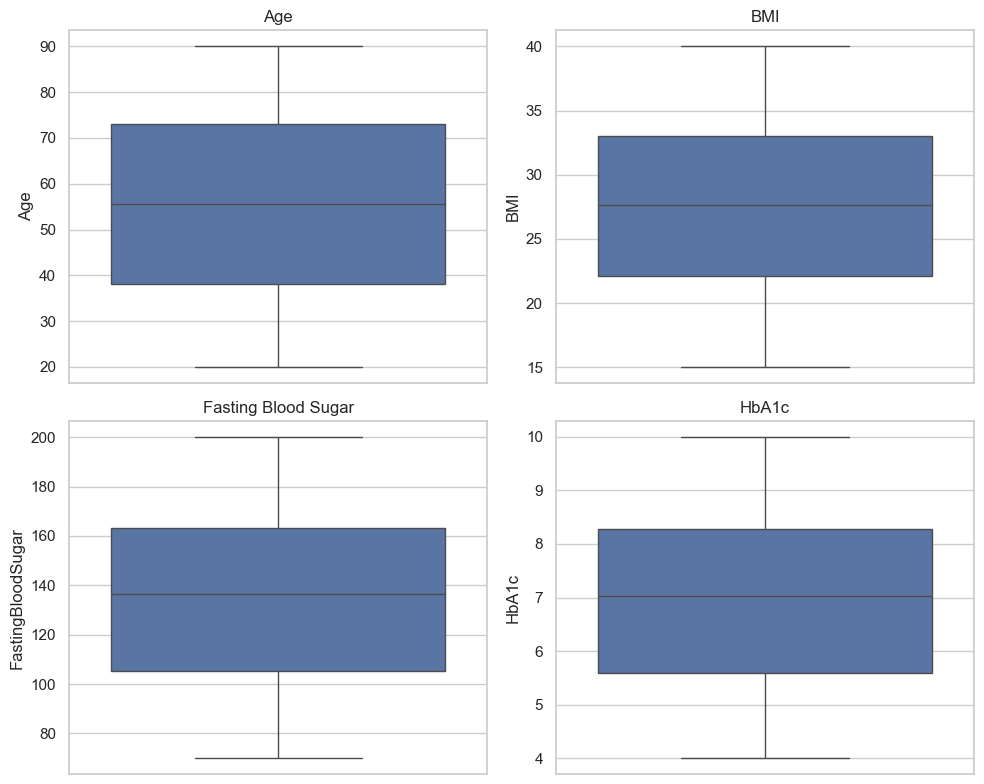

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.boxplot(data['Age'], ax=axes[0,0])
axes[0,0].set_title('Age')

sns.boxplot(data['BMI'], ax=axes[0,1])
axes[0,1].set_title('BMI')

sns.boxplot(data['FastingBloodSugar'], ax=axes[1,0])
axes[1,0].set_title('Fasting Blood Sugar')

sns.boxplot(data['HbA1c'], ax=axes[1,1])
axes[1,1].set_title('HbA1c')

plt.tight_layout()
plt.show()


In [30]:
data.to_csv('diabetes_cleaned.csv', index=False)
print("✅ Clean dataset saved successfully as 'diabetes_cleaned.csv'")


✅ Clean dataset saved successfully as 'diabetes_cleaned.csv'


In [31]:
# Basic dataset summary
print("Shape:", data.shape)
print("\nColumn Names:\n", data.columns.tolist())

# Quick statistics
print("\nDescriptive Statistics:\n", data.describe())

# Check data types and nulls
data.info()


Shape: (1888, 46)

Column Names:
 ['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryDiabetes', 'GestationalDiabetes', 'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications', 'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss', 'FatigueLevels', 'BlurredVision', 'SlowHealingSores', 'TinglingHandsFeet', 'QualityOfLifeScore', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality', 'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy', 'Diagnosis', 'DoctorInCharge']

Descriptive Statistics:
          PatientID          Age    Ethnicity  SocioeconomicStatus  \
cou

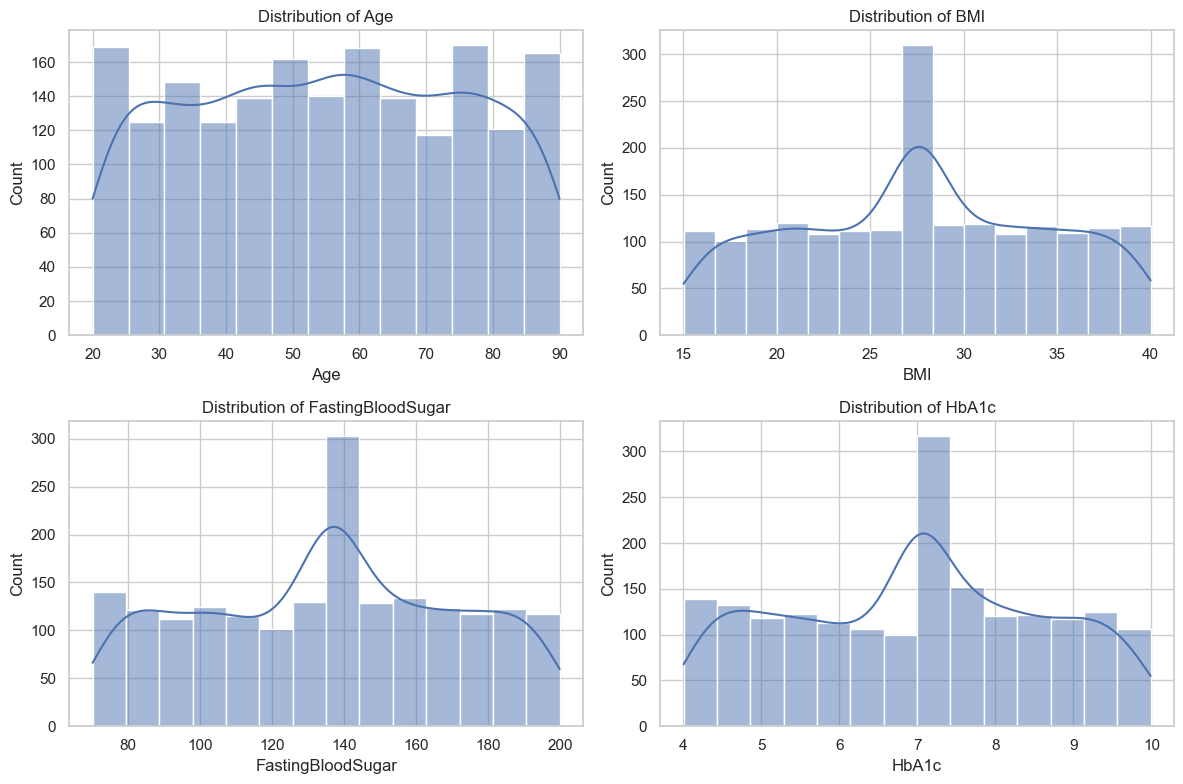

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set general style
sns.set(style="whitegrid")

# Plot histograms for major numeric columns
cols = ['Age', 'BMI', 'FastingBloodSugar', 'HbA1c']

plt.figure(figsize=(12,8))
for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_9404\707822275.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


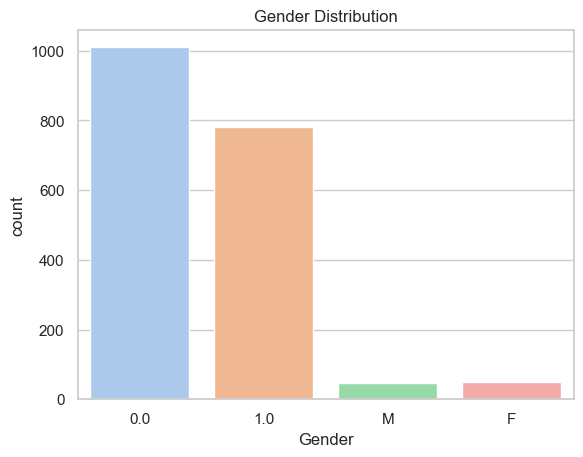

C:\Users\asus\AppData\Local\Temp\ipykernel_9404\707822275.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=data, palette='muted')


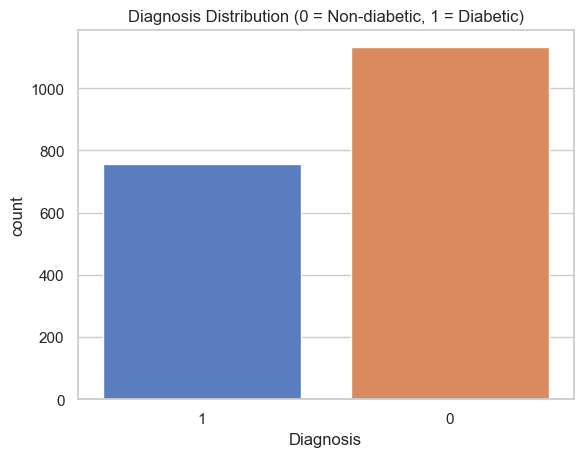

In [33]:
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='Diagnosis', data=data, palette='muted')
plt.title('Diagnosis Distribution (0 = Non-diabetic, 1 = Diabetic)')
plt.show()


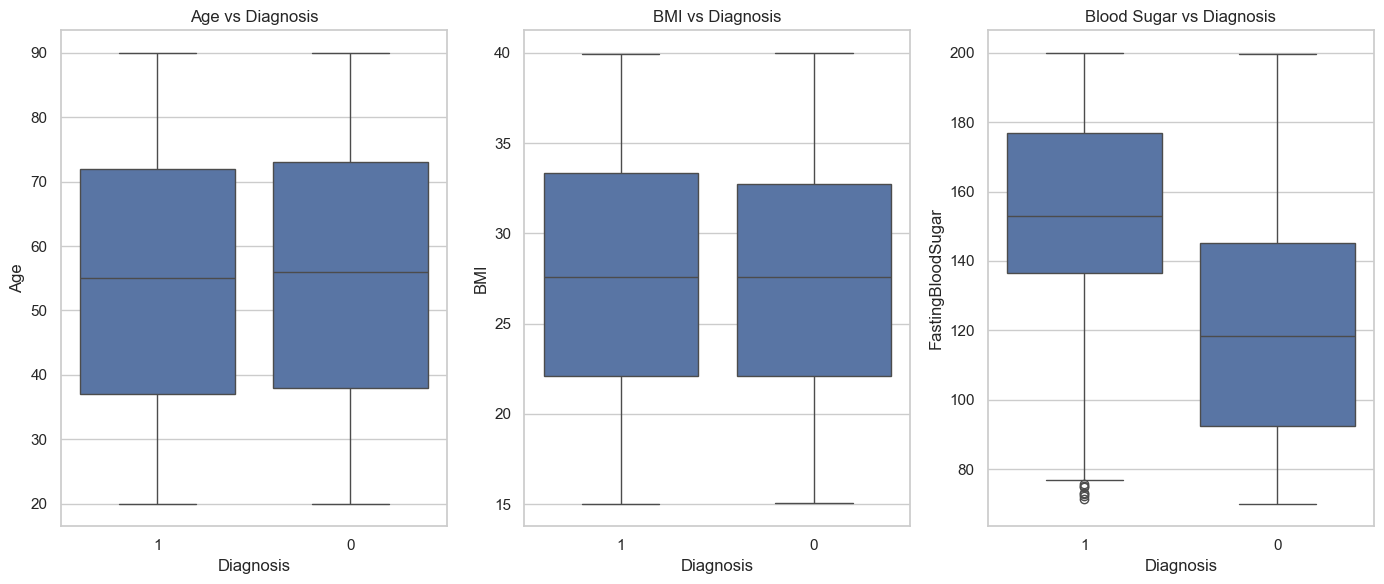

In [34]:
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
sns.boxplot(x='Diagnosis', y='Age', data=data)
plt.title('Age vs Diagnosis')

plt.subplot(1,3,2)
sns.boxplot(x='Diagnosis', y='BMI', data=data)
plt.title('BMI vs Diagnosis')

plt.subplot(1,3,3)
sns.boxplot(x='Diagnosis', y='FastingBloodSugar', data=data)
plt.title('Blood Sugar vs Diagnosis')

plt.tight_layout()
plt.show()


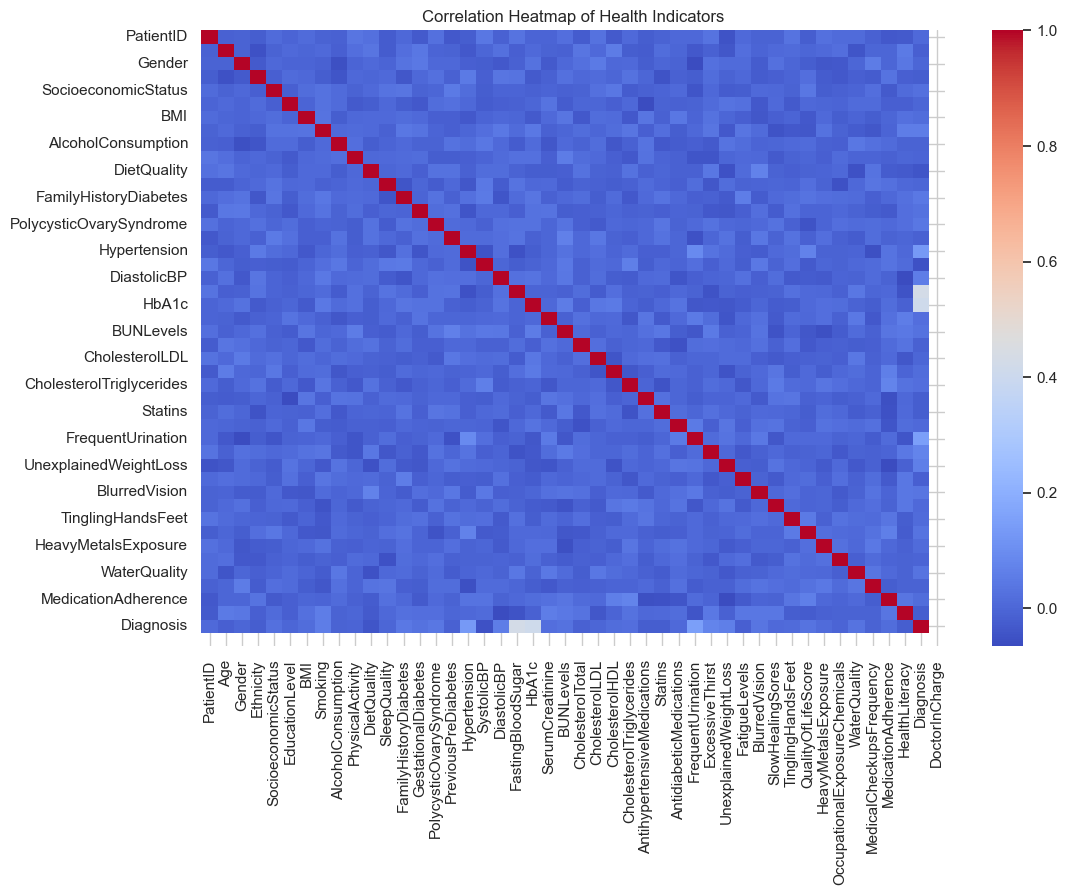

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# First, create a copy of the data and convert non-numeric values to NaN
numeric_data = data.copy()

# Option 1: Replace non-numeric values with NaN
for col in numeric_data.columns:
    # Convert columns to numeric, coercing errors to NaN
    numeric_data[col] = pd.to_numeric(numeric_data[col], errors='coerce')

# Option 2: Or alternatively, drop columns with non-numeric values
# numeric_data = data.select_dtypes(include=[np.number])

# Now create the correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Health Indicators')
plt.show()

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [39]:
# Features and target variable
X = data[['Age', 'BMI', 'FastingBloodSugar', 'HbA1c']]
y = data['Diagnosis']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


Training Samples: 1510
Testing Samples: 378


In [41]:
# Create the model
model = LogisticRegression(max_iter=1000)

# Train it
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


✅ Model Accuracy: 78.31 %

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       217
           1       0.77      0.71      0.74       161

    accuracy                           0.78       378
   macro avg       0.78      0.77      0.78       378
weighted avg       0.78      0.78      0.78       378



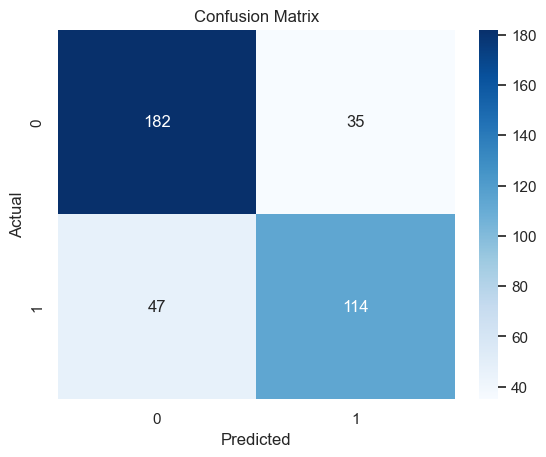

In [42]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Model Accuracy:", round(accuracy * 100, 2), "%")

# Detailed performance report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [43]:
# Example: predict a new patient
new_patient = pd.DataFrame({
    'Age': [45],
    'BMI': [32.5],
    'FastingBloodSugar': [180],
    'HbA1c': [8.2]
})

prediction = model.predict(new_patient)
print("Predicted Diagnosis (1 = Diabetic, 0 = Non-Diabetic):", prediction[0])


Predicted Diagnosis (1 = Diabetic, 0 = Non-Diabetic): 1
